# Plotting Accuracy, Predicted Ground Cover, and Harvest Metrics

This final notebook uses the statistcs made in "4.0_Accuracy_Assessment.ipynb", percent cover found in "5.0_Percent_Vegetation.ipynb", and harvested data found in the Google Drive to plot the results. First, the overall accuracy will be plotted using Seaborn's categorical plot. Next, correlations are plotted between ground truth references values and colors/indices. Then, percent vegetation is graphed over time. Finally, harvested data is compared to average colors/indicies collected on the final date. 

Luke Rosen

6/16/2022

6/24/2022 Update

Made most of the graphs greyscale.


6/30/2022 Update
Added RMSE

7/18/2022 Update

Simplified cells.


In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import os
import numpy as np
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats

In [2]:
if not os.path.exists("./graphs/"):
    os.mkdir("./graphs/")
graph_out = "./graphs/"     

## Plotting Overall Accuracy

The next few cells use the image statistics to plot overall accuracy over time. Seaborn will be used to create a catagorical plot. Each cover type (post, under, and fallow) are plotted with  the points showing the mean accuracy as a percent and the bars are the confidence interval at 95%. A note that because plots were randomly selected, the cover types are not equally represented. 

In [3]:
Stats = pd.read_csv("./Image_Stats.csv")


In [4]:
Stats

,Image,Plot,Date_Index,Date,Variety,Cover,EXG_Local_AC,EXG_Local_PR,EXG_Local_RC,EXGR_Local_AC,...,VARI_Zero_RC,ALL_Mode_AC,ALL_Mode_PR,Mode_RC,ZERO_Mode_AC,ZERO_Mode_PR,ZERO_Mode_RC,Global_Zero_Mode_AC,GLobal_Zero_Mode_PR,GLobal_Zero_Mode_RC
0,207A_20210821,207A,20210821,08/21/2021,Oat,Under,0.133333,0.071429,1.000000,0.133333,...,1.000000,0.766667,0.222222,1.000000,0.900000,0.400000,1.000000,0.933333,0.500000,1.000000
1,301A_20210821,301A,20210821,08/21/2021,Oat,Post,0.833333,0.000000,0.000000,0.133333,...,1.000000,0.666667,0.285714,1.000000,0.666667,0.285714,1.000000,0.933333,0.666667,1.000000
2,409B_20210821,409B,20210821,08/21/2021,Oat,Fallow,0.866667,0.555556,1.000000,0.200000,...,0.800000,0.866667,0.555556,1.000000,0.866667,0.555556,1.000000,0.900000,0.625000,1.000000
3,310B_20210821,310B,20210821,08/21/2021,Oat,Fallow,0.200000,0.206897,0.857143,0.200000,...,0.714286,0.833333,0.625000,0.714286,0.866667,0.714286,0.714286,0.900000,0.833333,0.714286
4,207B_20210821,207B,20210821,08/21/2021,Oat,Fallow,0.733333,0.333333,0.600000,0.166667,...,0.800000,0.700000,0.333333,0.800000,0.700000,0.333333,0.800000,0.733333,0.333333,0.600000
5,107B_20210821,107B,20210821,08/21/2021,Oat,Post,0.233333,0.233333,1.000000,0.233333,...,0.857143,0.766667,0.500000,0.714286,0.866667,0.714286,0.714286,0.833333,1.000000,0.285714
6,104B_20210821,104B,20210821,08/21/2021,Oat,Post,0.933333,0.000000,0.000000,0.100000,...,1.000000,0.633333,0.153846,1.000000,0.633333,0.153846,1.000000,0.866667,0.250000,0.500000
7,407C_20210909,407C,20210909,09/09/2021,Oat,Post,0.166667,0.137931,1.000000,0.166667,...,0.500000,0.433333,0.117647,0.500000,0.766667,0.285714,0.500000,0.900000,0.666667,0.500000
8,202A_20210909,202A,20210909,09/09/2021,Oat,Under,0.800000,0.928571,0.722222,0.800000,...,1.000000,0.833333,0.809524,0.944444,0.766667,0.720000,1.000000,0.800000,0.772727,0.944444
9,102A_20210909,102A,20210909,09/09/2021,Oat,Fallow,0.133333,0.103448,1.000000,0.166667,...,0.000000,0.633333,0.214286,1.000000,0.766667,0.000000,0.000000,0.766667,0.000000,0.000000


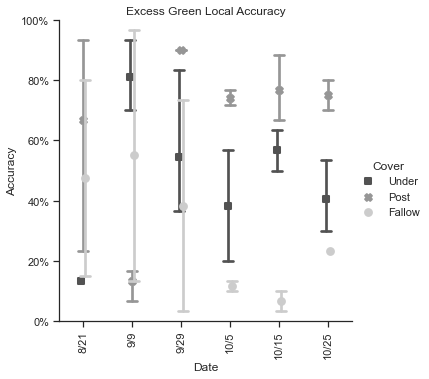

In [5]:
##EXG Local plot 
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Local_AC",  hue="Cover", markers = ["s", "X", "o"],  ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696",  "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90)  ## Manual overide date values
ax.set(title= "Excess Green Local Accuracy")

ax.savefig(graph_out + "EXG_LOCAL_AC", dpi = 300)

In [6]:
model = ols("EXG_Local_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXG_LOCAL_ANOVA.csv")

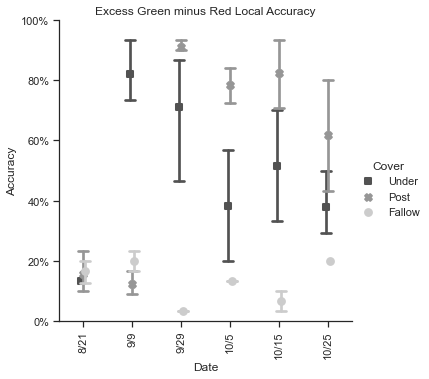

In [7]:
##EXGR Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Local_AC",  hue="Cover", markers = ["s", "X", "o"],  ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90)  ## Manual override date values
ax.set(title= "Excess Green minus Red Local Accuracy")

ax.savefig(graph_out + "EXGR_LOCAL_AC", dpi = 300)

In [8]:
model = ols("EXGR_Local_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXGR_LOCAL_ANOVA.csv")

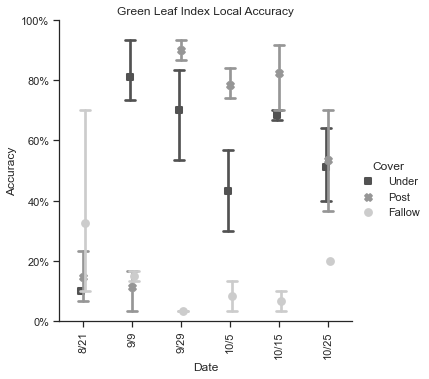

In [9]:
## GLI Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Local_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max is 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Local Accuracy")

ax.savefig(graph_out + "GLI_LOCAL_AC", dpi= 300)

In [10]:
model = ols("GLI_Local_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "GLI_LOCAL_ANOVA.csv")

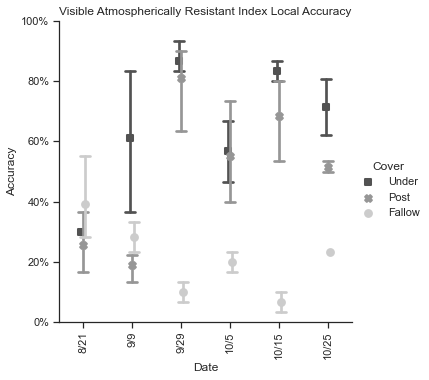

In [11]:
## VARI Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Local_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels([ "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Local Accuracy")

ax.savefig(graph_out + "VARI_LOCAL_AC", dpi = 300)

In [12]:
model = ols("VARI_Local_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "VARI_LOCAL_ANOVA.csv")

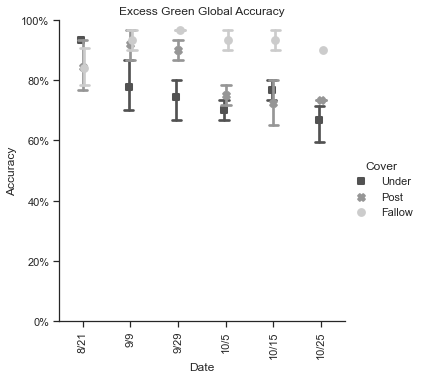

In [13]:
## EXG Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Global_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels([ "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green Global Accuracy")

ax.savefig(graph_out + "EXG_GLOBAL_AC", dpi = 300)

In [14]:
model = ols("EXG_Global_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXG_GLOBAL_ANOVA.csv")

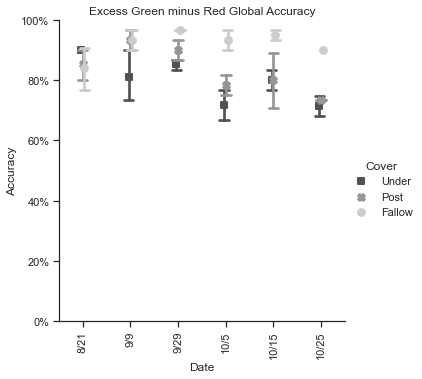

In [15]:
## EXGR Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Global_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green minus Red Global Accuracy")

ax.savefig(graph_out + "EXGR_GLOBAL_AC", dpi = 300)

In [16]:
model = ols("EXGR_Global_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXGR_GLOBAL_ANOVA.csv")

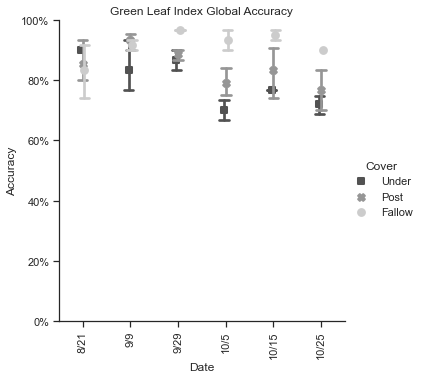

In [17]:
## GLI Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Global_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Global Accuracy")

ax.savefig(graph_out + "GLI_GLOBAL_AC", dpi = 300)

In [18]:
model = ols("GLI_Global_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "GLI_GLOBAL_ANOVA.csv")

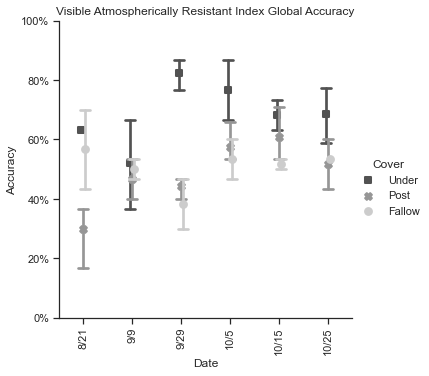

In [19]:
## VARI Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Global_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Global Accuracy")

ax.savefig(graph_out + "VARI_GLOBAL_AC", dpi = 300)

In [20]:
model = ols("VARI_Global_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "VARI_GLOBAL_ANOVA.csv")

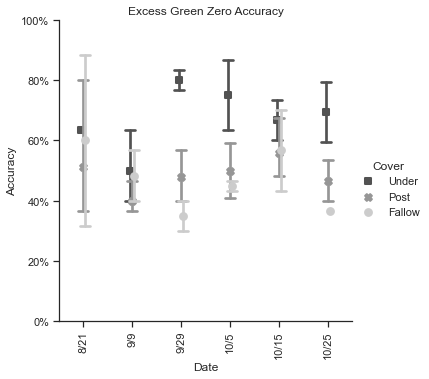

In [21]:
## EXG Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Zero_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green Zero Accuracy")

ax.savefig(graph_out + "EXG_ZERO_AC", dpi = 300)

In [22]:
model = ols("EXG_Zero_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXG_ZERO_ANOVA.csv")

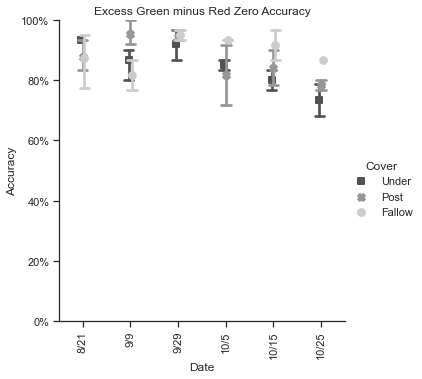

In [23]:
## EXGR Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Zero_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green minus Red Zero Accuracy")

ax.savefig(graph_out + "EXGR_ZERO_AC", dpi = 300)

In [24]:
model = ols("EXGR_Zero_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "EXGR_ZERO_ANOVA.csv")

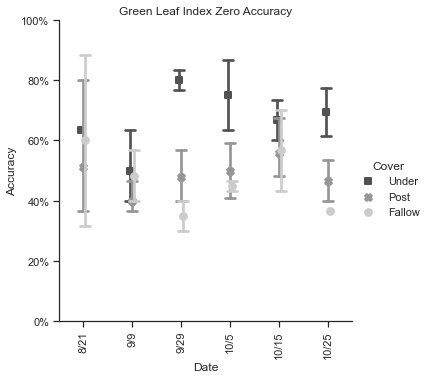

In [25]:
## GLI Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Zero_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Zero Accuracy")

ax.savefig(graph_out + "GLI_ZERO_AC", dpi = 300)

In [26]:
model = ols("GLI_Zero_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "GLI_ZERO_ANOVA.csv")

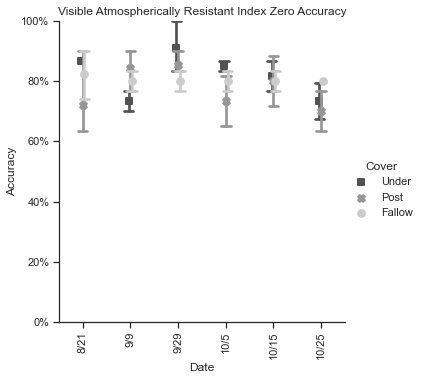

In [27]:
## VARI Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Zero_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Zero Accuracy")

ax.savefig(graph_out + "VARI_ZERO_AC", dpi = 300)

In [28]:
model = ols("VARI_Zero_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "VARI_ZERO_ANOVA.csv")

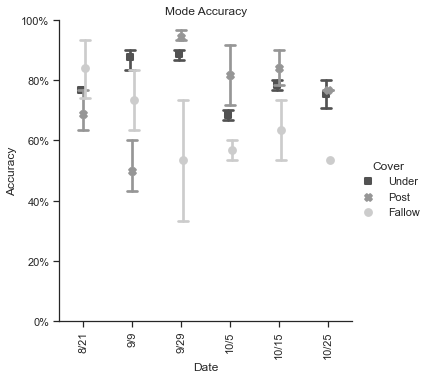

In [29]:
## Mode 
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "ALL_Mode_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Mode Accuracy")

ax.savefig(graph_out + "Mode_AC", dpi = 300)

In [30]:
model = ols("ALL_Mode_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "Mode_Anova.csv")

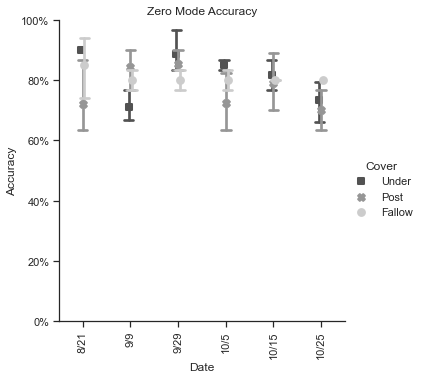

In [31]:
## Zero Mode
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "ZERO_Mode_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Zero Mode Accuracy")

ax.savefig(graph_out + "Zero_Mode_AC", dpi = 300)

In [32]:
model = ols("ZERO_Mode_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "Zero_Mode_Anova.csv")

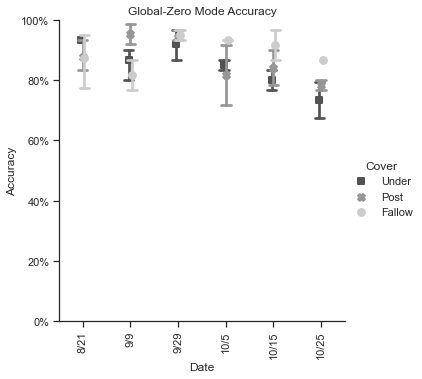

In [33]:
## Global Zero Mode
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "Global_Zero_Mode_AC",  hue="Cover", markers = ["s", "X", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#525252", "#969696", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Global-Zero Mode Accuracy")

ax.savefig(graph_out + "Global_Zero_Mode_AC", dpi = 300)

In [34]:
model = ols("Global_Zero_Mode_AC ~ C(Date) * C(Cover)", data = Stats).fit()
result = sm.stats.anova_lm(model, typ=2)
result.to_csv(graph_out + "Global_Zero_Mode_Anova.csv")

## Reference Correlations
The next cells use the reference colors and indices to find correlations between ground-truthed  vegetation and ground-truth non-vegetation. Seborn will create a joint plot that has a histogram  and a scatter plot of vegetation (in orange) and non-vegetation (in blue). 

In [35]:
Ground_Truth = pd.read_csv("./Ground_Truth.csv")

In [36]:
Ground_Truth

,Image,Plot,X,Y,Date_Index,Date,Variety,Cover,Reference,Predicted_EXG_L,...,Predicted_ALL_MODE,Predicted_ZERO_MODE,Predicted_GLOBAL_ZERO_MODE,EXG_Value,EXGR_Value,GLI_Value,VARI_Value,Red_Value,Green_Value,Blue_Value
0,207A_20210821,207A,170.0,1130.0,20210821,08/21/2021,Oat,Under,0,1,...,0,0,0,0.000000e+00,-0.168553,0.000000,-0.065574,0.358491,0.333333,0.308176
1,207A_20210821,207A,533.0,773.0,20210821,08/21/2021,Oat,Under,0,1,...,1,0,0,9.695291e-02,-0.091967,0.070994,-0.058201,0.396122,0.365651,0.238227
2,207A_20210821,207A,926.0,1283.0,20210821,08/21/2021,Oat,Under,0,1,...,0,0,0,-5.551115e-17,-0.317949,0.000000,-0.220859,0.465201,0.333333,0.201465
3,207A_20210821,207A,1024.0,44.0,20210821,08/21/2021,Oat,Under,0,1,...,0,0,0,-4.545455e-02,-0.268182,-0.034483,-0.166667,0.386364,0.318182,0.295455
4,207A_20210821,207A,204.0,62.0,20210821,08/21/2021,Oat,Under,0,1,...,1,0,0,9.727626e-03,-0.135798,0.007278,-0.021505,0.344358,0.336576,0.319066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,103C_20210909,103C,1100.0,1234.0,20210909,09/09/2021,Oat,Under,0,0,...,0,1,0,7.692308e-02,-0.058689,0.056604,0.013423,0.353276,0.358974,0.287749
1436,103C_20210909,103C,1049.0,419.0,20210909,09/09/2021,Oat,Under,0,0,...,0,0,0,7.142857e-02,-0.071429,0.052632,0.000000,0.357143,0.357143,0.285714
1437,103C_20210909,103C,354.0,168.0,20210909,09/09/2021,Oat,Under,0,0,...,0,0,0,5.337079e-02,-0.096910,0.039501,-0.016779,0.358146,0.351124,0.290730
1438,103C_20210909,103C,706.0,970.0,20210909,09/09/2021,Oat,Under,1,1,...,1,1,1,2.673797e-01,0.278075,0.187970,0.296296,0.294118,0.422460,0.283422


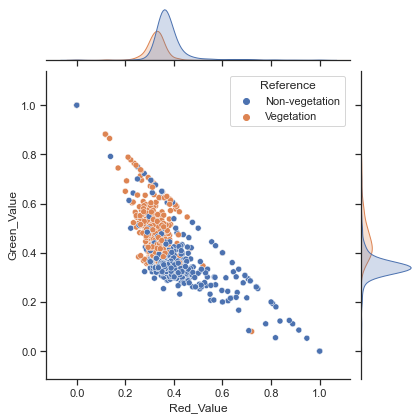

In [37]:
## Green vs Red

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "Red_Value", y = "Green_Value", data = Ground_Truth.replace({"Reference":{0:"Non-vegetation",1:"Vegetation"}}) , 
                hue = "Reference")
#ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])      ## 1, 0
#ax.ax_joint.legend_._visible= False                          ## removes default legend 


ax.savefig(graph_out+ "Reference_Color", bbox_inches = "tight", dpi = 300)




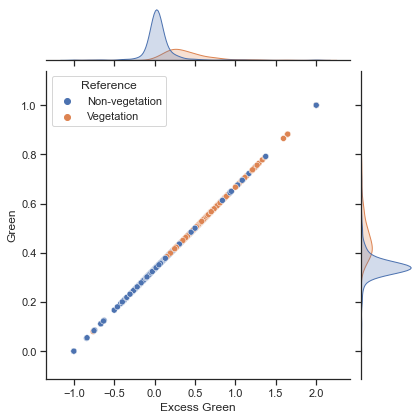

In [38]:
## Green vs EXG

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "EXG_Value", y = "Green_Value", data = Ground_Truth.replace({"Reference":{0:"Non-vegetation",1:"Vegetation"}}) , 
                hue = "Reference")
#ax.ax_joint.legend_._visible= False                      ## Removes default legend            
ax.set_axis_labels("Excess Green", "Green")
#ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.savefig(graph_out + "Reference_EXG", bbox_inches = "tight", dpi = 300)

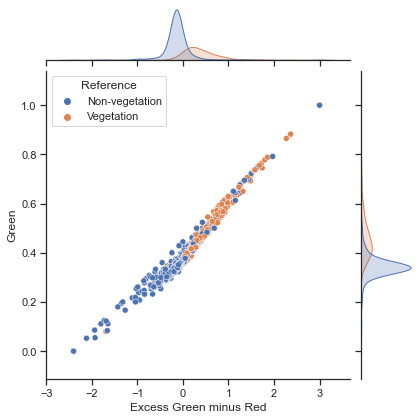

In [39]:
## Green vs EXGR

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "EXGR_Value", y = "Green_Value", data = Ground_Truth.replace({"Reference":{0:"Non-vegetation",1:"Vegetation"}}), 
                hue = "Reference")
#ax.ax_joint.legend_._visible= False                         ## Removes default legend   
#ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.set_axis_labels("Excess Green minus Red", "Green")

ax.savefig(graph_out + "Reference_EXGR", bbox_inches = "tight", dpi = 300)

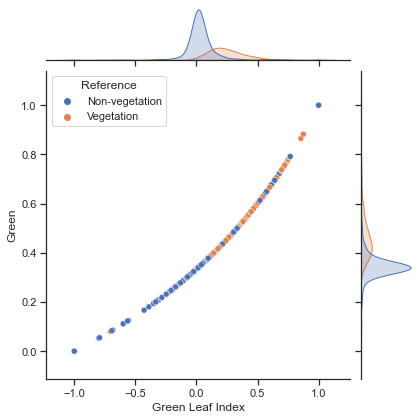

In [40]:
sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "GLI_Value", y = "Green_Value", data = Ground_Truth.replace({"Reference":{0:"Non-vegetation",1:"Vegetation"}}), 
                hue = "Reference")
#ax.ax_joint.legend_._visible= False                      ## Removes default legend   
#ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.set_axis_labels("Green Leaf Index", "Green")

ax.savefig(graph_out + "Reference_GLI", bbox_inches = "tight", dpi = 300)

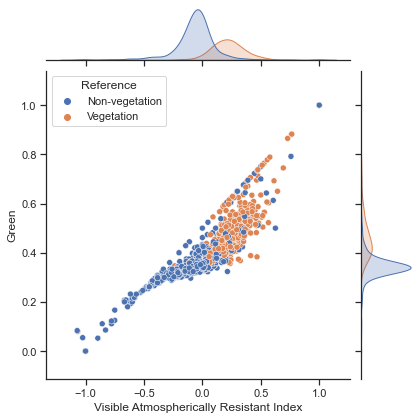

In [41]:
sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "VARI_Value", y = "Green_Value", data = Ground_Truth.replace({"Reference":{0:"Non-vegetation",1:"Vegetation"}}), 
                hue = "Reference")
#ax.ax_joint.legend_._visible= False                       ## Removes default legend   
#ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])   ## 1, 0
ax.set_axis_labels( "Visible Atmospherically Resistant Index", "Green")

ax.savefig(graph_out + "Reference_VARI", bbox_inches = "tight", dpi = 300)

## Visuallizing Percent Vegetation 

The next few cells will be used to graph percent vegetation over time calulated by classified EXGR Zero Vegetation. The dates are converted to integers to make the relative distance between them correct. Then seaborn will be used to create a line graph with 95% confidence intervals. Oat harvest date and post clover plant date are aslo shown. 

In [42]:
Oat_Data = pd.read_csv("Oat_Data.csv")

In [43]:
Oat_Data.Date=pd.to_datetime(Oat_Data.Date, format="%m/%d/%Y")  

In [44]:
Days = Oat_Data.Date -Oat_Data.Date.min() ## Date 7/8 will be 0

In [45]:
Oat_Data["Days"] = Days.dt.days ## Days as integer

C:\Users\Owner\AppData\Local\Temp\ipykernel_23208\489849136.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ["8/17", "8/27", "9/6", "9/16", "9/26", "10/6", "10/16", "10/26"], rotation= 90) ## first date not shown in the manual override.


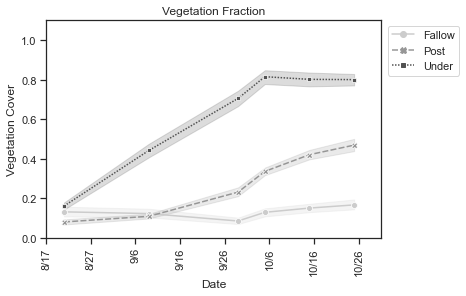

In [46]:
sns.set_theme(style ="ticks")

ax = sns.lineplot(data = Oat_Data[(Oat_Data["Days"]!=0)], x="Days", y="Vegetation_Fraction",   
                   hue="Cover", palette = ["#cccccc", "#969696", "#525252"], style = "Cover", markers = True)  

ax.set(xlabel = "Date", ylabel = "Vegetation Cover",  
        ylim=(0,1.1), xlim=(40, 115), 
        #yticklabels = (["0%", "20%", "40%", "60%", "80%", "100%"]),  ## Mannual override Y labels
       title = "Vegetation Fraction") 
ax.set_xticklabels(labels = ["8/17", "8/27", "9/6", "9/16", "9/26", "10/6", "10/16", "10/26"], rotation= 90) ## first date not shown in the manual override.
#ax.axvline(29, color='dimgrey', ls = "--", label = "Crop Harvest")  ## Crop harvest on 8/6
#ax.axvline(35, color='dimgrey', ls = ":", label = "Post Plant")     ## Post Seeded clover planted on 8/12
ax.legend(bbox_to_anchor=(1.25,1))

plt.savefig(graph_out + "Percent_Vegetation", bbox_inches = "tight", dpi = 300)



## Harvest Metrics

The final cells use the final date and harvest metrices to find biomass, nitrogen, and carbon:nitrgen correlations with the mean indices. First, the final date is clipped from the rest of the data. Then, the clover biomass (kg/ha),  nitrogen (% by mass), and carbon:nitrogen (ratio) are mergeed to the dataframe. Finally, fallow data is removed. 

In [47]:
Bio_Data = pd.read_excel("Oat-Clover_Plot_Map_and_Datasheet.xlsx")

In [48]:
Harvest = Oat_Data[(Oat_Data["Date_Index"]== 20211025)].reset_index(drop = True)  ##Separates the last date. 

In [49]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,EXGR_Global_Thresh,GLI_Global_Thresh,VARI_Global_Thresh,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation,Days
0,101A_20211025,101A,20211025,2021-10-25,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,0.205078,0.160156,-0.089844,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827,109
1,101B_20211025,101B,20211025,2021-10-25,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,0.205078,0.160156,-0.089844,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921,109
2,101C_20211025,101C,20211025,2021-10-25,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,0.205078,0.160156,-0.089844,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713,109
3,102A_20211025,102A,20211025,2021-10-25,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,0.205078,0.160156,-0.089844,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812,109
4,102B_20211025,102B,20211025,2021-10-25,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,0.205078,0.160156,-0.089844,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,2021-10-25,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,0.205078,0.160156,-0.089844,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816,109
116,409C_20211025,409C,20211025,2021-10-25,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,0.205078,0.160156,-0.089844,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079,109
117,410A_20211025,410A,20211025,2021-10-25,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,0.205078,0.160156,-0.089844,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510,109
118,410B_20211025,410B,20211025,2021-10-25,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,0.205078,0.160156,-0.089844,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896,109


In [50]:
Harvest["Biomass"] = Bio_Data["clover_fall_kg_ha"]  ##Biomass (kg/ha)

In [51]:
Harvest["Nitrogen"]= Bio_Data["clover_N_fall"] ##Nitrogen (percent by mass)

In [52]:
Harvest["Carbon_Nitrogen"] = Bio_Data["clover_cn_fall"] ##Carbon-Nitrogen Ratio

In [53]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation,Days,Biomass,Nitrogen,Carbon_Nitrogen
0,101A_20211025,101A,20211025,2021-10-25,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827,109,0.000000,NaN,NaN
1,101B_20211025,101B,20211025,2021-10-25,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921,109,135.036087,4.6815,9.518744
2,101C_20211025,101C,20211025,2021-10-25,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713,109,701.976108,3.1371,14.062670
3,102A_20211025,102A,20211025,2021-10-25,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812,109,0.000000,NaN,NaN
4,102B_20211025,102B,20211025,2021-10-25,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894,109,222.386454,4.0756,10.506920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,2021-10-25,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816,109,0.000000,NaN,NaN
116,409C_20211025,409C,20211025,2021-10-25,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079,109,182.809951,3.6463,11.697610
117,410A_20211025,410A,20211025,2021-10-25,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510,109,976.631753,3.1714,13.706560
118,410B_20211025,410B,20211025,2021-10-25,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896,109,0.000000,NaN,NaN


In [54]:
Harvest = Harvest[(Harvest["Cover"]!="Fallow")]               ## Removes all fallow plots (e.g. no data)

In [55]:
##Defining RMSE
def rmse(x,y, summary):                                 
    y_true = y
    slope = summary.slope
    intercept = summary.intercept
    y_pred= x*slope + intercept                       ##Line Equation
    result = np.sqrt(((y_pred - y_true)**2).mean())
    return(result)

In [56]:
Correlation = []

R_Squared = []

P_Value = []

RMSE = []

Slope = []

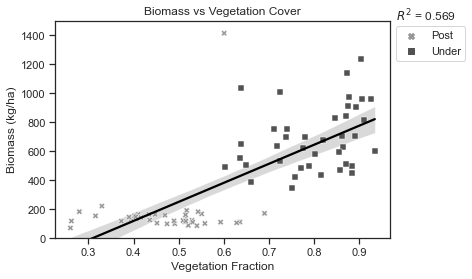

In [57]:
## Biomass vs VC (from EXGR Zero)
summary = stats.linregress(Harvest["Vegetation_Fraction"], Harvest["Biomass"])


sns.set_theme(style ="ticks")
line = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, scatter = False, color = "black")  ## TrendLine 
line.set(ylim = (0, 1500))
line.text(.98, 1500, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, 
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Vegetation Fraction", ylabel = "Biomass (kg/ha)",
       title = "Biomass vs Vegetation Cover")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "Biomass_VC", bbox_inches = "tight", dpi = 300)




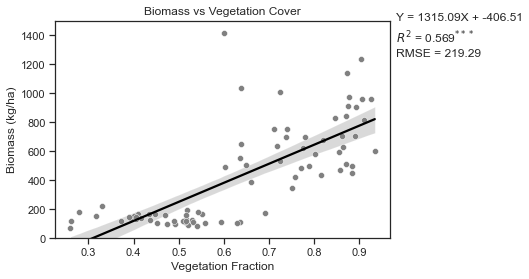

In [58]:
## Biomass vs VC (from EXGR Zero)
summary = stats.linregress(Harvest["Vegetation_Fraction"], Harvest["Biomass"])
Correlation.append("Biomass_VF")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["Vegetation_Fraction"], Harvest["Biomass"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, scatter = False, color = "black")  ## TrendLine 
line.set(ylim = (0, 1500))
line.text(.98, 1500, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.98, 1350, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.98, 1250, "RMSE = " + "{:.2f}".format(rmse(Harvest["Vegetation_Fraction"], Harvest["Biomass"], summary))) ## RMSE
ax = sns.scatterplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, color = "Grey", legend = False)
ax.set(xlabel = "Vegetation Fraction", ylabel = "Biomass (kg/ha)",
       title = "Biomass vs Vegetation Cover")


plt.savefig(graph_out + "Biomass_VC_C", bbox_inches = "tight", dpi = 300)

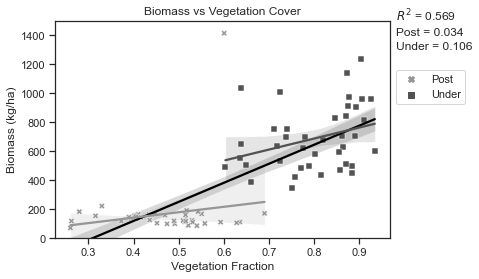

In [59]:
## Biomass vs VC (from EXGR Zero)
summary = stats.linregress(Harvest["Vegetation_Fraction"], Harvest["Biomass"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"]=="Post")]["Vegetation_Fraction"], Harvest[(Harvest["Cover"]=="Post")]["Biomass"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"]=="Under")]["Vegetation_Fraction"], Harvest[(Harvest["Cover"]=="Under")]["Biomass"])


sns.set_theme(style ="ticks")
line = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, scatter = False, color = "black")  ## TrendLine 
line.set(ylim = (0, 1500))
line.text(.98, 1500, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest[(Harvest["Cover"]=="Post")], scatter = False, color = "#969696")  ## TrendLine 
line1.set(ylim = (0, 1500))
line1.text(.98, 1400, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest[(Harvest["Cover"]=="Under")], scatter = False, color = "#525252")  ## TrendLine 
line2.set(ylim = (0, 1500))
line2.text(.98, 1300, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared




ax = sns.scatterplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, 
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Vegetation Fraction", ylabel = "Biomass (kg/ha)",
       title = "Biomass vs Vegetation Cover")
ax.legend(bbox_to_anchor=(1,.8))

plt.savefig(graph_out + "Biomass_VC_sep", bbox_inches = "tight", dpi = 300)

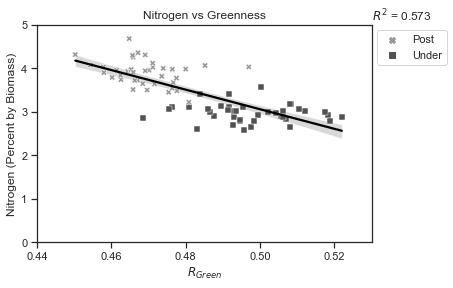

In [60]:
## Nitrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.53, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = r"$R_{Green}$", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.44, 0.53), ylim = (0, 5),
       title = "Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_Greenness", bbox_inches = "tight", dpi = 300)

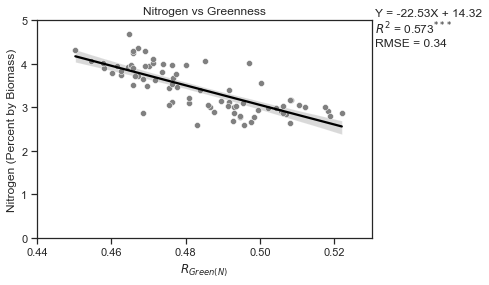

In [61]:
## Nitrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Nitrogen"])
Correlation.append("Nitrogen_Green")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["Green_Avg_Vegetation"], Harvest["Nitrogen"], summary))
Slope.append(summary.slope)

sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.531, 5.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.531, 4.7, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.531, 4.4, "RMSE = " + "{:.2f}".format(rmse(Harvest["Green_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest, color = "Grey", legend = False)
ax.set(xlabel = r"$R_{Green(N)}$", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.44, 0.53), ylim = (0, 5),
       title = "Nitrogen vs Greenness")

plt.savefig(graph_out + "Nitrogen_Greenness_C", bbox_inches = "tight", dpi = 300)

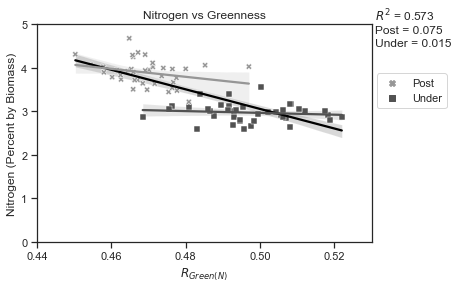

In [62]:
## Nitrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"]=="Post")]["Green_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Post")]["Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"]=="Under")]["Green_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Under")]["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.531, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Post")], scatter = False, color = "#969696")  ## TrendLine
line.text(.531, 4.8, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Under")], scatter = False, color = "#525252")  ## TrendLine
line.text(.531, 4.5, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = r"$R_{Green(N)}$", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.44, 0.53), ylim = (0, 5),
       title = "Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1.24,.8))

plt.savefig(graph_out + "Nitrogen_Greenness_sep", bbox_inches = "tight", dpi = 300)

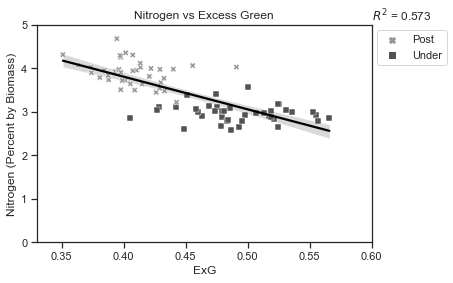

In [63]:
## Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.6, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExG", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.6), ylim= (0,5),
       title = "Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_EXG", bbox_inches = "tight", dpi = 300)

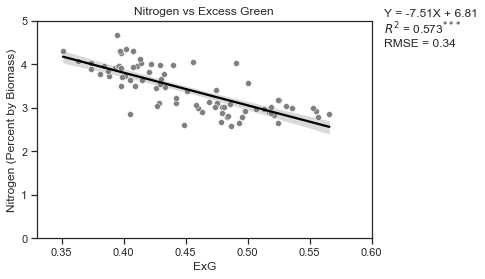

In [64]:
## Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Nitrogen"])
Correlation.append("Nitrogen_EXG")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXG_Avg_Vegetation"], Harvest["Nitrogen"], summary))
Slope.append(summary.slope)

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.61, 5.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.61, 4.7, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.61, 4.4, "RMSE = " + "{:.2f}".format(rmse(Harvest["EXG_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "ExG", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.6), ylim= (0,5),
       title = "Nitrogen vs Excess Green")


plt.savefig(graph_out + "Nitrogen_EXG", bbox_inches = "tight", dpi = 300)

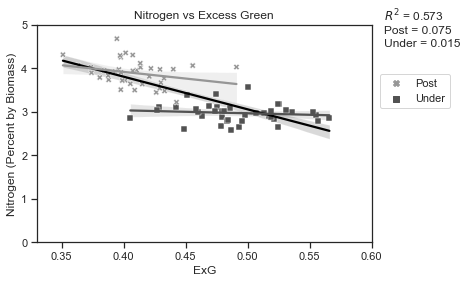

In [65]:
## Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"]=="Post")]["EXG_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Post")]["Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"]=="Under")]["EXG_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Under")]["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.61, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared



line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Post")], scatter = False, color = "#969696")  ## TrendLine
line.text(.61, 4.8, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Under")], scatter = False, color = "#525252")  ## TrendLine
line.text(.61, 4.5, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExG", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.6), ylim= (0,5),
       title = "Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1.25,.8))

plt.savefig(graph_out + "Nitrogen_EXG_C", bbox_inches = "tight", dpi = 300)

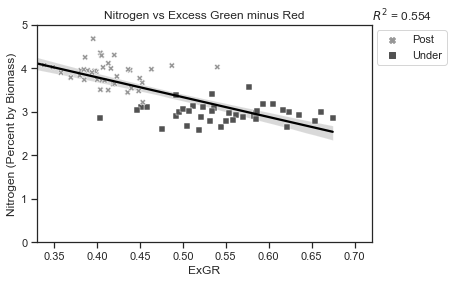

In [66]:
## Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.72, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExGR", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.72), ylim = (0,5),
       title = "Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_EXGR", bbox_inches = "tight", dpi = 300)

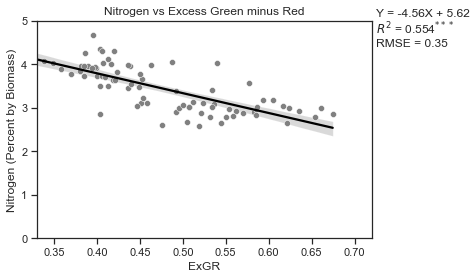

In [67]:
## Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"])
Correlation.append("Nitrogen_EXGR")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.725, 5.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.725, 4.7, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.725, 4.4, "RMSE = " + "{:.2f}".format(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "ExGR", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.72), ylim = (0,5),
       title = "Nitrogen vs Excess Green minus Red")


plt.savefig(graph_out + "Nitrogen_EXGR_C", bbox_inches = "tight", dpi = 300)

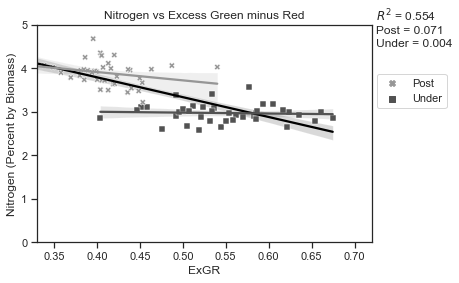

In [68]:
## Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"]=="Post")]["EXGR_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Post")]["Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"]=="Under")]["EXGR_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Under")]["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.725, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Post")], scatter = False, color = "#969696")  ## TrendLine
line1.text(.725, 4.8, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Under")], scatter = False, color = "#525252")  ## TrendLine
line2.text(.725, 4.5, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared


ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExGR", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.33, 0.72), ylim = (0,5),
       title = "Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1.24,.8))

plt.savefig(graph_out + "Nitrogen_EXGR_sep", bbox_inches = "tight", dpi = 300)

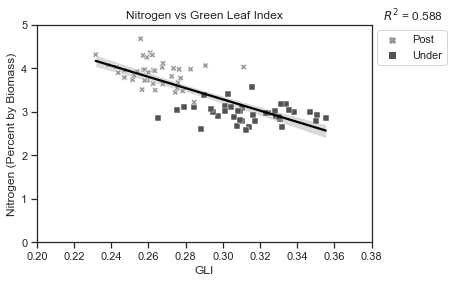

In [69]:
## Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "GLI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.2, 0.38), ylim = (0,5),
       title = "Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_GLI", bbox_inches = "tight", dpi = 300)

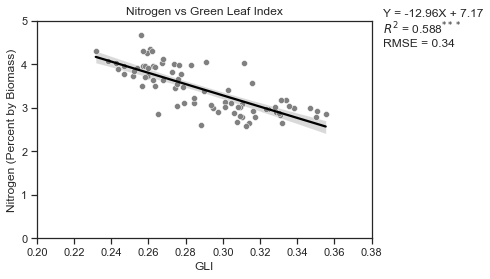

In [70]:
## Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Nitrogen"])
Correlation.append("Nitrogen_GLI")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["GLI_Avg_Vegetation"], Harvest["Nitrogen"], summary))
Slope.append(summary.slope)

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 5.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.386, 4.7, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.386, 4.4, "RMSE = " + "{:.2f}".format(rmse(Harvest["GLI_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "GLI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.2, 0.38), ylim = (0,5),
       title = "Nitrogen vs Green Leaf Index")


plt.savefig(graph_out + "Nitrogen_GLI_C", bbox_inches = "tight", dpi = 300)

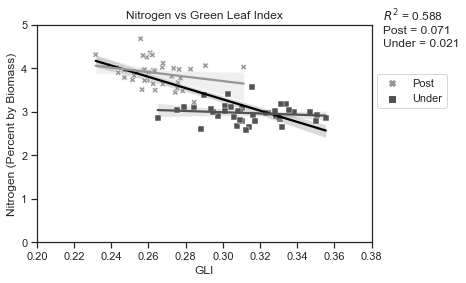

In [71]:
## Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"]=="Post")]["GLI_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Post")]["Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"]=="Under")]["GLI_Avg_Vegetation"], Harvest[(Harvest["Cover"]=="Under")]["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Post")], scatter = False, color = "#969696")  ## TrendLine
line1.text(.386, 4.8, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]=="Under")], scatter = False, color = "#525252")  ## TrendLine
line2.text(.386, 4.5, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "GLI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.2, 0.38), ylim = (0,5),
       title = "Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1.24,.8))

plt.savefig(graph_out + "Nitrogen_GLI_sep", bbox_inches = "tight", dpi = 300)

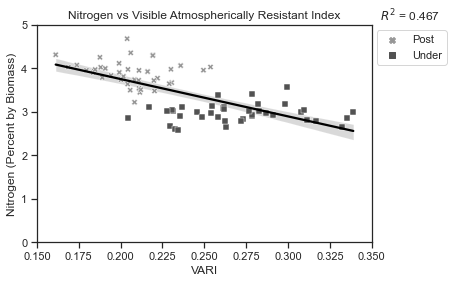

In [72]:
## Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black") ## TrendLine
line.text(.355, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "VARI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.15, 0.35), ylim  =(0,5),
       title = "Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_VARI", bbox_inches = "tight", dpi = 300)

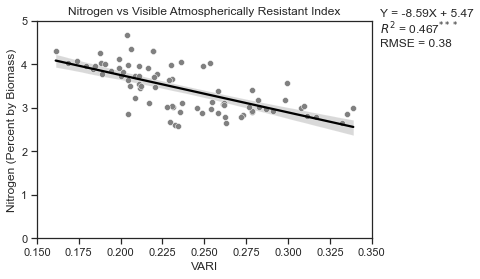

In [73]:
## Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Nitrogen"])
Correlation.append("Nitrogen_VARI")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["VARI_Avg_Vegetation"], Harvest["Nitrogen"], summary))
Slope.append(summary.slope)

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black") ## TrendLine
line.text(.355, 5.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.355, 4.7, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.355, 4.4, "RMSE = " + "{:.2f}".format(rmse(Harvest["VARI_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "VARI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.15, 0.35), ylim  =(0,5),
       title = "Nitrogen vs Visible Atmospherically Resistant Index")

plt.savefig(graph_out + "Nitrogen_VARI_C", bbox_inches = "tight", dpi = 300)

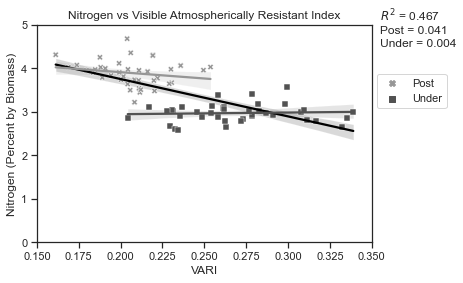

In [74]:
## Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["VARI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["VARI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Nitrogen"])



sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black") ## TrendLine
line.text(.355, 5.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696") ## TrendLine
line1.text(.355, 4.8, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252") ## TrendLine
line2.text(.355, 4.5, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared





ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "VARI", ylabel = "Nitrogen (Percent by Biomass)",
       xlim = (0.15, 0.35), ylim  =(0,5),
       title = "Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1.24,.8))

plt.savefig(graph_out + "Nitrogen_VARI_sep", bbox_inches = "tight", dpi = 300)

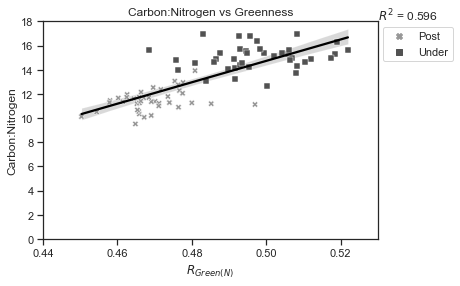

In [75]:
## Carbon:NItrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])


sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.53, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = r"$R_{Green(N)}$", ylabel = "Carbon:Nitrogen",
       xlim = (0.44, 0.53), ylim = (0,18),
       title = "Carbon:Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_Greenness", bbox_inches = "tight", dpi = 300)

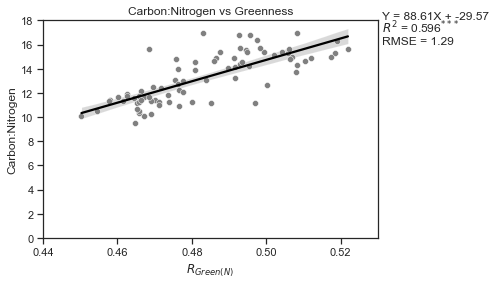

In [76]:
## Carbon:NItrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_Green")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["Green_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.531, 18.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.531, 17, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.531, 16, "RMSE = " + "{:.2f}".format(rmse(Harvest["Green_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")

ax.set(xlabel = r"$R_{Green(N)}$", ylabel = "Carbon:Nitrogen",
       xlim = (0.44, 0.53), ylim = (0,18),
       title = "Carbon:Nitrogen vs Greenness")


plt.savefig(graph_out + "CN_Greenness_C", bbox_inches = "tight", dpi = 300)

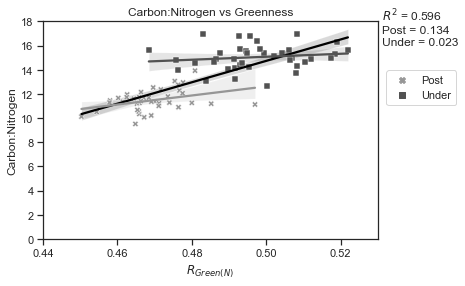

In [77]:
## Carbon:NItrogen vs Greenness
summary = stats.linregress(Harvest["Green_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["Green_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Carbon_Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["Green_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Carbon_Nitrogen"])



sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.531, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696")  ## TrendLine
line.text(.531, 17, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252")  ## TrendLine
line.text(.531, 16, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared




ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = r"$R_{Green(N)}$", ylabel = "Carbon:Nitrogen",
       xlim = (0.44, 0.53), ylim = (0,18),
       title = "Carbon:Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1.25,.8))

plt.savefig(graph_out + "CN_Greenness_sep", bbox_inches = "tight", dpi = 300)

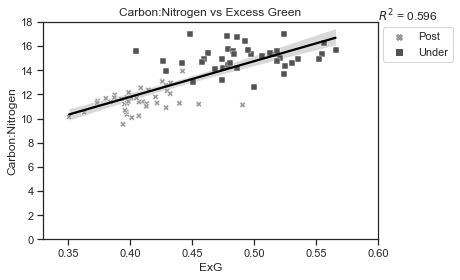

In [78]:
## Carbon:Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.6, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExG", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.6), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_EXG", bbox_inches = "tight", dpi = 300)

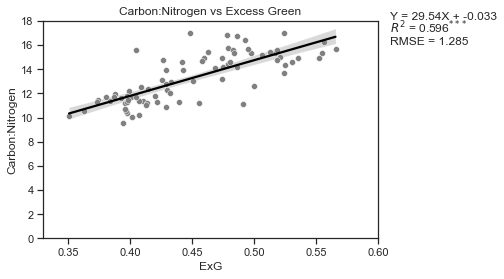

In [79]:
## Carbon:Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_EXG")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXG_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.61, 18.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2}".format(summary.intercept))
line.text(.61, 17, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.61, 16, "RMSE = " + "{:.3f}".format(rmse(Harvest["EXG_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "ExG", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.6), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green")

plt.savefig(graph_out + "CN_EXG_C", bbox_inches = "tight", dpi = 300)

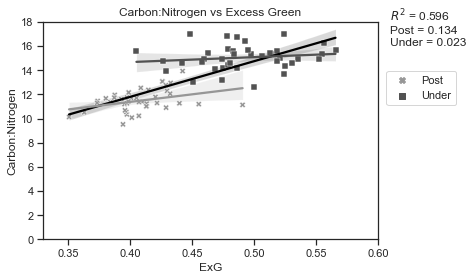

In [80]:
## Carbon:Nitrogen vs EXG
summary = stats.linregress(Harvest["EXG_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["EXG_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Carbon_Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["EXG_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.61, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696")  ## TrendLine
line1.text(.61, 17, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252")  ## TrendLine
line2.text(.61, 16, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExG", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.6), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1.25,.8))

plt.savefig(graph_out + "CN_EXG_sep", bbox_inches = "tight", dpi = 300)

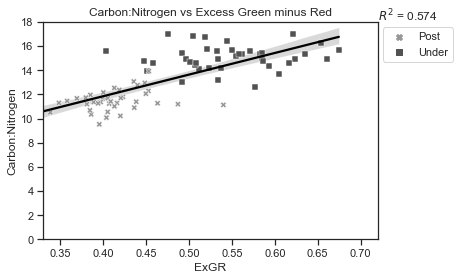

In [81]:
## Carbon:Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.72, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExGR", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.72), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1,1))


plt.savefig(graph_out + "CN_EXGR", bbox_inches = "tight", dpi = 300)

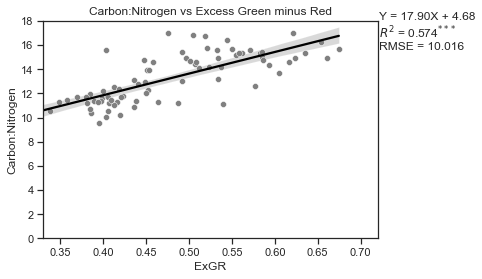

In [82]:
## Carbon:Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_EXGR")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.721, 18.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.721, 16.6, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.721, 15.6, "RMSE = " + "{:.3f}".format(rmse(Harvest["EXGR_Avg_Vegetation"], Harvest["Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "ExGR", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.72), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green minus Red")



plt.savefig(graph_out + "CN_EXGR_C", bbox_inches = "tight", dpi = 300)

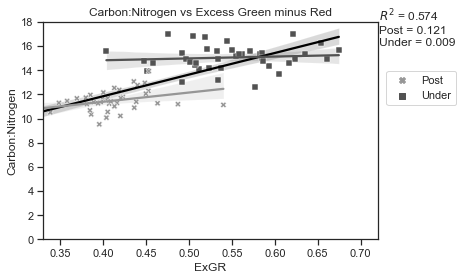

In [83]:
## Carbon:Nitrogen vs EXGR
summary = stats.linregress(Harvest["EXGR_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["EXGR_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Carbon_Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["EXGR_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.721, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696")  ## TrendLine
line1.text(.721, 17, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252")  ## TrendLine
line2.text(.721, 16, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared



ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "ExGR", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.72), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1.25,.8))


plt.savefig(graph_out + "CN_EXGR_sep", bbox_inches = "tight", dpi = 300)

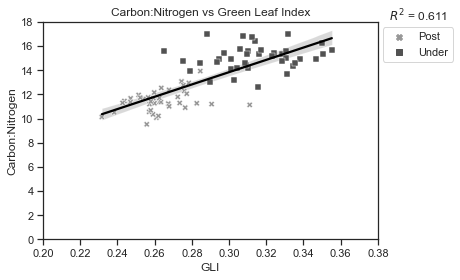

In [84]:
## Carbon:Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "GLI", ylabel = "Carbon:Nitrogen",
       xlim = (0.20, 0.38), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1,1))


plt.savefig(graph_out + "CN_GLI", bbox_inches = "tight", dpi = 300)

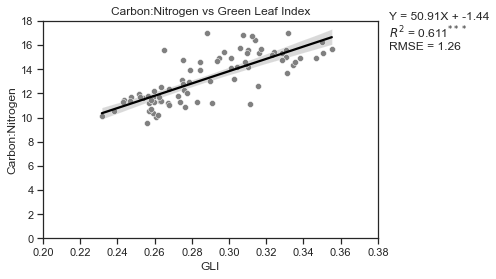

In [85]:
## Carbon:Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_GLI")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["GLI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 18.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.386, 16.6, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.386, 15.6, "RMSE = " + "{:.2f}".format(rmse(Harvest["GLI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")
            
ax.set(xlabel = "GLI", ylabel = "Carbon:Nitrogen",
       xlim = (0.20, 0.38), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Green Leaf Index")



plt.savefig(graph_out + "CN_GLI_C", bbox_inches = "tight", dpi = 300)

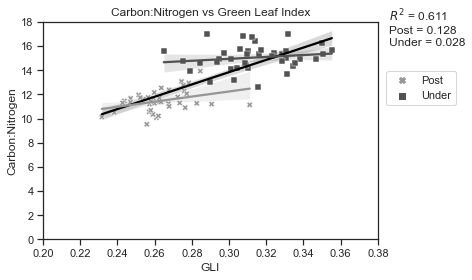

In [86]:
## Carbon:Nitrogen vs GLI
summary = stats.linregress(Harvest["GLI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["GLI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Carbon_Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["GLI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696")  ## TrendLine
line1.text(.386, 17, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252")  ## TrendLine
line.text(.386, 16, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared


ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "GLI", ylabel = "Carbon:Nitrogen",
       xlim = (0.20, 0.38), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1.25,.8))


plt.savefig(graph_out + "CN_GLI_sep", bbox_inches = "tight", dpi = 300)

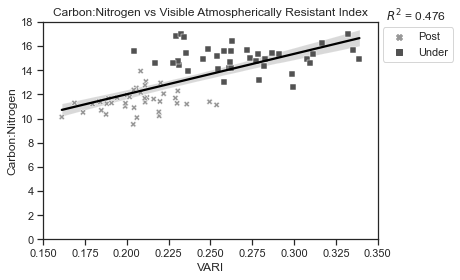

In [87]:
## Carbon:Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.set(ylim = (0))
line.text(.355, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "VARI", ylabel = "Carbon:Nitrogen",
       xlim = (0.15, 0.35), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_VARI", bbox_inches = "tight", dpi = 300)

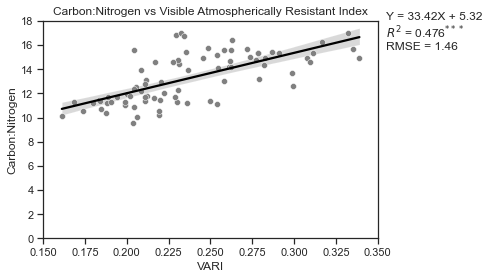

In [88]:
## Carbon:Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
Correlation.append("CN_VARI")
P_Value.append(summary.pvalue)
R_Squared.append(summary.rvalue**2)
RMSE.append(rmse(Harvest["VARI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))
Slope.append(summary.slope)


sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.set(ylim = (0))
line.text(.355, 18.1, "Y = " + "{:.2f}".format(summary.slope) + "X + " + "{:.2f}".format(summary.intercept))
line.text(.355, 16.6, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2) + r"$^{***}$") ## R-Squared
line.text(.355, 15.6, "RMSE = " + "{:.2f}".format(rmse(Harvest["VARI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"], summary))) ## RMSE
ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, color = "Grey")
ax.set(xlabel = "VARI", ylabel = "Carbon:Nitrogen",
       xlim = (0.15, 0.35), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Visible Atmospherically Resistant Index")

plt.savefig(graph_out + "CN_VARI_C", bbox_inches = "tight", dpi = 300)

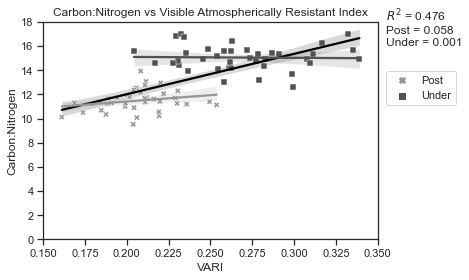

In [89]:
## Carbon:Nitrogen vs VARI
summary = stats.linregress(Harvest["VARI_Avg_Vegetation"], Harvest["Carbon_Nitrogen"])
summary1 = stats.linregress(Harvest[(Harvest["Cover"] == "Post")]["VARI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Post")]["Carbon_Nitrogen"])
summary2 = stats.linregress(Harvest[(Harvest["Cover"] == "Under")]["VARI_Avg_Vegetation"], Harvest[(Harvest["Cover"] == "Under")]["Carbon_Nitrogen"])

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.set(ylim = (0))
line.text(.355, 18.1, r"$R^2$" + " = " + "{:.3f}".format(summary.rvalue**2)) ## R-Squared

line1 = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Post")], scatter = False, color = "#969696")  ## TrendLine
line1.set(ylim = (0))
line1.text(.355, 17, "Post = " + "{:.3f}".format(summary1.rvalue**2)) ## R-Squared

line2 = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"] == "Under")], scatter = False, color = "#525252")  ## TrendLine
line2.set(ylim = (0))
line2.text(.355, 16, "Under = " + "{:.3f}".format(summary2.rvalue**2)) ## R-Squared

ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest,
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "VARI", ylabel = "Carbon:Nitrogen",
       xlim = (0.15, 0.35), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1.25,.8))

plt.savefig(graph_out + "CN_VARI_sep", bbox_inches = "tight", dpi = 300)

In [90]:
Cor_Sum = pd.DataFrame({"Correlation":Correlation, "P_Value":P_Value, "R_Squared":R_Squared, "RMSE":RMSE, "Slope":Slope})

In [91]:
Cor_Sum

,Correlation,P_Value,R_Squared,RMSE,Slope
0,Biomass_VF,6.769460e-16,0.568672,219.293352,1315.086961
1,Nitrogen_Green,4.712021e-16,0.572624,0.342803,-22.529524
2,Nitrogen_EXG,4.712021e-16,0.572624,0.342803,-7.509841
3,Nitrogen_EXGR,2.549298e-15,0.553899,0.350233,-4.562428
4,Nitrogen_GLI,1.079977e-16,0.588329,0.336446,-12.955483
5,Nitrogen_VARI,2.804576e-12,0.467259,0.382735,-8.585904
6,CN_Green,5.165636e-17,0.595977,1.285041,88.614747
7,CN_EXG,5.165636e-17,0.595977,1.285041,29.538249
8,CN_EXGR,4.280058e-16,0.573667,1.320045,17.901302
9,CN_GLI,1.133526e-17,0.611266,1.260492,50.913455


In [92]:
Cor_Sum.to_csv(graph_out + "Correlation_Summary.csv", index = False)

This concludes the notebook and the results of the project.